In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [3]:
df=pd.read_csv("movement_data_flattened.csv")

In [17]:
df.head()

,subject_id,record_name,rows,device_location,Time,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z
0,1,Relaxed,2048,LeftWrist,0.000000,-0.003958,0.002360,1.746120e-03,-0.015492,0.005616,0.001034
1,1,Relaxed,2048,LeftWrist,0.009903,-0.004005,0.002259,8.355394e-04,-0.012276,0.005605,-0.003218
2,1,Relaxed,2048,LeftWrist,0.019901,0.000833,0.002225,9.437218e-04,-0.009051,0.002432,-0.002137
3,1,Relaxed,2048,LeftWrist,0.029907,-0.000191,0.004109,4.783000e-07,-0.008911,0.002154,-0.000931
4,1,Relaxed,2048,LeftWrist,0.039984,0.001769,0.004064,-1.902400e-03,-0.007830,0.000034,0.000145


In [7]:
df.shape

(13447168, 14)

In [9]:
# Drop the 'study_id', 'device_id', and 'record_id' columns
df = df.drop(columns=['study_id', 'device_id', 'record_id'])

In [11]:
df.columns

Index(['subject_id', 'record_name', 'rows', 'device_location', 'Time',
       'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyroscope_X',
       'Gyroscope_Y', 'Gyroscope_Z'],
      dtype='object')

In [13]:
print(df.columns.tolist())  # Ensure no extra spaces or typos


['subject_id', 'record_name', 'rows', 'device_location', 'Time', 'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyroscope_X', 'Gyroscope_Y', 'Gyroscope_Z']


In [19]:
# Filter for rows == 1024
filtered_df = df[df['rows'] == 1024]

# Get the list of unique record names
record_name_list = filtered_df['record_name'].unique().tolist()

In [21]:
record_name_list


['StretchHold',
 'LiftHold',
 'HoldWeight',
 'PointFinger',
 'DrinkGlas',
 'CrossArms',
 'TouchIndex',
 'TouchNose']

In [23]:
df[['Time']]

,Time
0,0.000000
1,0.009903
2,0.019901
3,0.029907
4,0.039984
...,...
13447163,20.567547
13447164,20.577599
13447165,20.587748
13447166,20.597736


In [25]:
df['record_name'].unique().tolist()

['Relaxed',
 'RelaxedTask',
 'StretchHold',
 'LiftHold',
 'HoldWeight',
 'PointFinger',
 'DrinkGlas',
 'CrossArms',
 'TouchIndex',
 'TouchNose',
 'Entrainment']

In [27]:
# Function to create time steps based on rows column
def create_time_steps(df, sampling_rate=100):
    new_time_df = pd.DataFrame()
    
    for record in df['record_name'].unique():
        record_df = df[df['record_name'] == record].copy()
        length = record_df.iloc[0]['rows']  # Get the total rows for this record_name
        total_samples = min(len(record_df), length)
        record_df['Time_Step'] = pd.Series([i / sampling_rate for i in range(total_samples)], index=record_df.index[:total_samples])
        new_time_df = pd.concat([new_time_df, record_df])
    
    return new_time_df

# Apply the function to create new time step column
new_df = create_time_steps(df)




In [112]:
new_df.head()

,subject_id,study_id,device_id,record_id,record_name,rows,device_location,Time,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,Time_Step
0,1,PADS,Apple Watch Series 4,Neurological Assessment,Relaxed,2048,LeftWrist,0.000000,-0.003958,0.002360,1.746120e-03,-0.015492,0.005616,0.001034,0.00
1,1,PADS,Apple Watch Series 4,Neurological Assessment,Relaxed,2048,LeftWrist,0.009903,-0.004005,0.002259,8.355394e-04,-0.012276,0.005605,-0.003218,0.01
2,1,PADS,Apple Watch Series 4,Neurological Assessment,Relaxed,2048,LeftWrist,0.019901,0.000833,0.002225,9.437218e-04,-0.009051,0.002432,-0.002137,0.02
3,1,PADS,Apple Watch Series 4,Neurological Assessment,Relaxed,2048,LeftWrist,0.029907,-0.000191,0.004109,4.783000e-07,-0.008911,0.002154,-0.000931,0.03
4,1,PADS,Apple Watch Series 4,Neurological Assessment,Relaxed,2048,LeftWrist,0.039984,0.001769,0.004064,-1.902400e-03,-0.007830,0.000034,0.000145,0.04


In [29]:
new_df['Time_Step'].value_counts()

Time_Step
0.00     11
5.13     11
6.75     11
6.76     11
6.77     11
         ..
13.70     3
13.71     3
13.72     3
13.73     3
20.47     3
Name: count, Length: 2048, dtype: int64

In [33]:
new_df.head()

,subject_id,record_name,rows,device_location,Time,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,Time_Step
0,1,Relaxed,2048,LeftWrist,0.000000,-0.003958,0.002360,1.746120e-03,-0.015492,0.005616,0.001034,0.00
1,1,Relaxed,2048,LeftWrist,0.009903,-0.004005,0.002259,8.355394e-04,-0.012276,0.005605,-0.003218,0.01
2,1,Relaxed,2048,LeftWrist,0.019901,0.000833,0.002225,9.437218e-04,-0.009051,0.002432,-0.002137,0.02
3,1,Relaxed,2048,LeftWrist,0.029907,-0.000191,0.004109,4.783000e-07,-0.008911,0.002154,-0.000931,0.03
4,1,Relaxed,2048,LeftWrist,0.039984,0.001769,0.004064,-1.902400e-03,-0.007830,0.000034,0.000145,0.04


In [35]:
new_df.shape

(13447168, 12)

In [37]:
df=new_df

In [39]:
df.columns

Index(['subject_id', 'record_name', 'rows', 'device_location', 'Time',
       'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyroscope_X',
       'Gyroscope_Y', 'Gyroscope_Z', 'Time_Step'],
      dtype='object')

C:\Users\akals\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


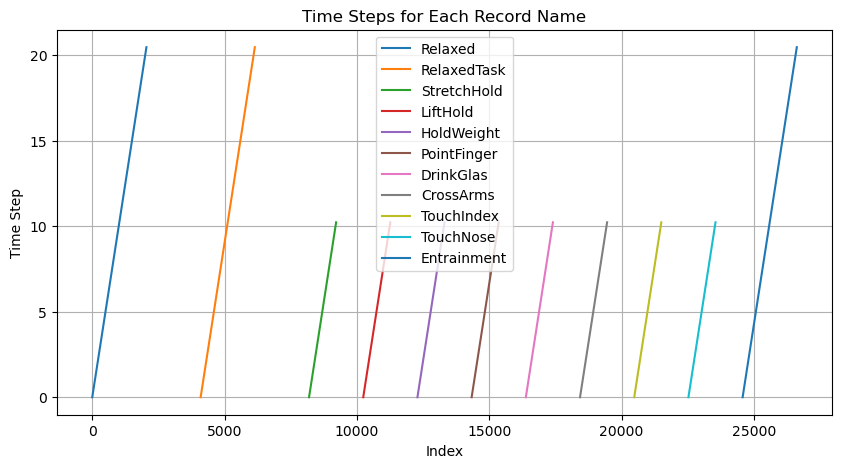

In [100]:
plt.figure(figsize=(10, 5))
for record in new_df['record_name'].unique():
    record_df = new_df[new_df['record_name'] == record]
    plt.plot(record_df['Time_Step'], label=record)

plt.xlabel('Index')
plt.ylabel('Time Step')
plt.title('Time Steps for Each Record Name')
plt.legend()
plt.grid(True)
plt.show()

#### Don't run this code as it going out of memory

In [128]:
def process_split_and_pivot(new_df):
    # Split 2048-row records (Relaxed, RelaxedTask, Entrainment) into two parts (10.24 seconds each)
    mask_2048 = new_df['movement_type'].isin(['Relaxed', 'RelaxedTask', 'Entrainment'])
    df_2048 = new_df[mask_2048]
    df_1024 = new_df[~mask_2048]

    # Process 2048-row movements (split into 2 parts)
    df_2048['half'] = (df_2048.groupby('record_name').cumcount() // 1024) + 1
    df_2048['task_part'] = df_2048['record_name'] + df_2048['half'].astype(str)

    # Process 1024-row movements (no splitting needed)
    df_1024['half'] = 1
    df_1024['task_part'] = df_1024['record_name'] + df_1024['half'].astype(str)

    # Drop the Time column for both dataframes
    df_2048.drop('Time', axis=1, inplace=True)
    df_1024.drop('Time', axis=1, inplace=True)

    # Melt both dataframes to long format
    df_2048_melted = df_2048.melt(id_vars=['subject_id', 'study_id', 'device_id', 'record_id', 'task_part', 'device_location', 'rows'],
                                  value_vars=['Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyroscope_X', 'Gyroscope_Y', 'Gyroscope_Z'],
                                  var_name='sensor_axis', value_name='value')
    
    df_1024_melted = df_1024.melt(id_vars=['subject_id', 'study_id', 'device_id', 'record_id', 'task_part', 'device_location', 'rows'],
                                  value_vars=['Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyroscope_X', 'Gyroscope_Y', 'Gyroscope_Z'],
                                  var_name='sensor_axis', value_name='value')

    # Extract sensor and axis from sensor_axis column for both dataframes
    df_2048_melted[['sensor', 'axis']] = df_2048_melted['sensor_axis'].str.split('_', expand=True)
    df_1024_melted[['sensor', 'axis']] = df_1024_melted['sensor_axis'].str.split('_', expand=True)

    # Generate channel names for both dataframes
    df_2048_melted['channel'] = df_2048_melted['task_part'] + '_' + df_2048_melted['device_location'] + '_' + df_2048_melted['sensor'] + '_' + df_2048_melted['axis']
    df_1024_melted['channel'] = df_1024_melted['task_part'] + '_' + df_1024_melted['device_location'] + '_' + df_1024_melted['sensor'] + '_' + df_1024_melted['axis']

    # Pivot the tables to wide format for both dataframes
    df_2048_pivot = df_2048_melted.pivot_table(index=['subject_id', 'study_id', 'device_id', 'record_id', 'task_part', 'device_location', 'rows'],
                                                columns='channel', values='value').reset_index()

    df_1024_pivot = df_1024_melted.pivot_table(index=['subject_id', 'study_id', 'device_id', 'record_id', 'task_part', 'device_location', 'rows'],
                                                columns='channel', values='value').reset_index()

    # Combine the processed dataframes
    df_combined = pd.concat([df_2048_pivot, df_1024_pivot], ignore_index=True)

    return df_combined

## 1.Splitting 2048-row and 1024-row Movements
mask_2048 = df['movement_type'].isin(['Relaxed', 'RelaxedTask', 'Entrainment'])
df_2048 = df[mask_2048]
df_1024 = df[~mask_2048]
## Purpose: This code separates the dataset into two subsets:
df_2048: Contains the movements Relaxed, RelaxedTask, and Entrainment, which have 2048 rows.
df_1024: Contains all other movements, which have 1024 rows.
The isin() function checks whether the movement_type of each record is one of the three specific types (i.e., Relaxed, RelaxedTask, or Entrainment), and ~mask_2048 selects the opposite of mask_2048 (i.e., the 1024-row movements).
## 2. Splitting 2048-Row Records into Two Parts
df_2048['half'] = (df_2048.groupby('record_name').cumcount() // 1024) + 1
df_2048['task_part'] = df_2048['record_name'] + df_2048['half'].astype(str)
## Purpose: The 2048-row records are split into two parts (since each part is 1024 rows).
df_2048['half']: The cumcount() function gives the cumulative count of each record grouped by record_name. Dividing it by 1024 ensures that the records are split into two groups: the first 1024 rows get a half value of 1, and the second 1024 rows get a half value of 2.
df_2048['task_part']: Combines the record_name and the half value (1 or 2) into a new column, task_part, which identifies the specific part of the task (e.g., record_name_1 for the first part, record_name_2 for the second part).
## 3. Processing 1024-Row Records (No Split)
df_1024['half'] = 1
df_1024['task_part'] = df_1024['record_name'] + df_1024['half'].astype(str)
## Purpose: For the 1024-row movements, the code simply assigns them a half value of 1 and creates a task_part using the record_name and half. Since there's no splitting required for 1024-row records, this part just labels them with half = 1.
## 4. Dropping the Time Column
df_2048.drop('Time', axis=1, inplace=True)
df_1024.drop('Time', axis=1, inplace=True)
## Purpose: Drops the Time column from both df_2048 and df_1024, since it is no longer needed for further processing.
## 5. Melting the DataFrames to Long Format ( Skip these steps as alreadly the dataframe is too long)
df_2048_melted = df_2048.melt(id_vars=['subject_id', 'study_id', 'device_id', 'record_id', 'task_part', 'device_location', 'rows'],
                               value_vars=['Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyroscope_X', 'Gyroscope_Y', 'Gyroscope_Z'],
                               var_name='sensor_axis', value_name='value')

df_1024_melted = df_1024.melt(id_vars=['subject_id', 'study_id', 'device_id', 'record_id', 'task_part', 'device_location', 'rows'],
                               value_vars=['Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyroscope_X', 'Gyroscope_Y', 'Gyroscope_Z'],
                               var_name='sensor_axis', value_name='value')
## Purpose: The melt() function is used to transform the data from wide format (where each sensor value is in a separate column) to long format (where sensor values are stacked in a single column).
id_vars: These are the columns that remain unchanged (identifiers for each measurement).
value_vars: These are the sensor readings (Accelerometer_X, Accelerometer_Y, etc.) that will be melted into a single value column.
var_name='sensor_axis': The melted variable names (sensor types and axes) will be combined into a column called sensor_axis.
value_name='value': The actual sensor data will go into a new column called value.
## 6. Extracting Sensor and Axis Information

df_2048_melted[['sensor', 'axis']] = df_2048_melted['sensor_axis'].str.split('_', expand=True)
df_1024_melted[['sensor', 'axis']] = df_1024_melted['sensor_axis'].str.split('_', expand=True)
Purpose: This splits the sensor_axis (which is a combination of sensor type and axis) into two separate columns:
sensor: The type of sensor (e.g., Accelerometer, Gyroscope).
axis: The axis of the sensor (e.g., X, Y, Z).
7. Generating Channel Names
df_2048_melted['channel'] = df_2048_melted['task_part'] + '_' + df_2048_melted['device_location'] + '_' + df_2048_melted['sensor'] + '_' + df_2048_melted['axis']
df_1024_melted['channel'] = df_1024_melted['task_part'] + '_' + df_1024_melted['device_location'] + '_' + df_1024_melted['sensor'] + '_' + df_1024_melted['axis']
Purpose: Creates a new channel column by concatenating the task_part, device_location, sensor, and axis. This will provide a unique identifier for each channel (e.g., record_1_Left_Accelerometer_X).
## 8. Pivoting the DataFrame to Wide Format
df_2048_pivot = df_2048_melted.pivot_table(index=['subject_id', 'study_id', 'device_id', 'record_id', 'task_part', 'device_location', 'rows'],
                                            columns='channel', values='value').reset_index()
df_1024_pivot = df_1024_melted.pivot_table(index=['subject_id', 'study_id', 'device_id', 'record_id', 'task_part', 'device_location', 'rows'],
                                            columns='channel', values='value').reset_index()
## Purpose: The pivot_table() function reshapes the melted data into a wide format where each channel becomes a separate column, and the corresponding value is placed in the appropriate cell.
## index: The columns that will remain as rows in the pivoted table (e.g., subject, study, device, record, etc.).
columns='channel': Each unique channel will become its own column.
values='value': The sensor data (value) will be placed in the pivoted columns.
## 9. Combining the DataFrames
df_combined = pd.concat([df_2048_pivot, df_1024_pivot], ignore_index=True)
## Purpose: Concatenates the two pivoted dataframes (df_2048_pivot and df_1024_pivot) into a single dataframe. This ensures that all the movements are combined into one dataset, with both 2048-row and 1024-row records.
## Final Output:
The final result is a combined dataframe where each row represents a unique measurement (from subject_id, study_id, etc.), and each sensor's data is spread across different columns for different axes (e.g., Accelerometer_X, Gyroscope_Y). The data is structured so that you can easily acc

In [135]:
def process_split_and_pivot(df):
    # Split 2048-row records (Relaxed, RelaxedTask, Entrainment) into two parts (10.24 seconds each)
    mask_2048 = df['movement_type'].isin(['Relaxed', 'RelaxedTask', 'Entrainment'])
    df_2048 = df[mask_2048]
    df_1024 = df[~mask_2048]

    # Process 2048-row movements (split into 2 parts)
    df_2048['half'] = (df_2048.groupby('record_name').cumcount() // 1024) + 1
    df_2048['task_part'] = df_2048['record_name'] + df_2048['half'].astype(str)

    # Process 1024-row movements (no splitting needed)
    df_1024['half'] = 1
    df_1024['task_part'] = df_1024['record_name'] + df_1024['half'].astype(str)

    # Extract sensor and axis from sensor_axis column for both dataframes (assuming columns already exist)
    df_2048[['sensor', 'axis']] = df_2048['sensor_axis'].str.split('_', expand=True)
    df_1024[['sensor', 'axis']] = df_1024['sensor_axis'].str.split('_', expand=True)

    # Generate channel names for both dataframes
    df_2048['channel'] = df_2048['task_part'] + '_' + df_2048['device_location'] + '_' + df_2048['sensor'] + '_' + df_2048['axis']
    df_1024['channel'] = df_1024['task_part'] + '_' + df_1024['device_location'] + '_' + df_1024['sensor'] + '_' + df_1024['axis']

    # Pivot the tables to wide format for both dataframes
    df_2048_pivot = df_2048.pivot_table(index=['subject_id', 'study_id', 'device_id', 'record_id', 'task_part', 'device_location', 'rows'],
                                        columns='channel', values='value').reset_index()

    df_1024_pivot = df_1024.pivot_table(index=['subject_id', 'study_id', 'device_id', 'record_id', 'task_part', 'device_location', 'rows'],
                                        columns='channel', values='value').reset_index()

    # Combine the processed dataframes
    df_combined = pd.concat([df_2048_pivot, df_1024_pivot], ignore_index=True)

    return df_combined


In [45]:


def process_split_and_pivot(df):
    if 'value' not in df.columns:
        raise ValueError("Column 'value' is missing from DataFrame")

    # Identify 2048-row movements
    mask_2048 = df['movement_type'].isin(['Relaxed', 'RelaxedTask', 'Entrainment'])
    df_2048 = df[mask_2048].copy()
    df_1024 = df[~mask_2048].copy()

    # Process 2048-row movements (split into two parts)
    df_2048['half'] = (df_2048.groupby('record_name').cumcount() // 1024) + 1
    df_2048['task_part'] = df_2048['record_name'] + '_' + df_2048['half'].astype(str)

    # Normalize time steps to always range from 0 to 10.24s
    df_2048['time'] = df_2048.groupby(['record_name', 'half']).cumcount() * (10.24 / 1024)

    # Process 1024-row movements (no splitting needed)
    df_1024['task_part'] = df_1024['record_name']  # Remove unnecessary '_1'
    df_1024['time'] = df_1024.groupby('record_name').cumcount() * (10.24 / 1024)

    # Ensure sensor_axis column exists before splitting
    if 'sensor_axis' in df_2048.columns:
        df_2048[['sensor', 'axis']] = df_2048['sensor_axis'].str.split('_', expand=True)
    if 'sensor_axis' in df_1024.columns:
        df_1024[['sensor', 'axis']] = df_1024['sensor_axis'].str.split('_', expand=True)

    # Generate channel names
    df_2048['channel'] = df_2048['task_part'] + '_' + df_2048['device_location'] + '_' + df_2048['sensor'] + '_' + df_2048['axis']
    df_1024['channel'] = df_1024['record_name'] + '_' + df_1024['device_location'] + '_' + df_1024['sensor'] + '_' + df_1024['axis']

    # Debug: Check if DataFrames have the correct structure
    print("df_2048 sample:", df_2048.head())
    print("df_1024 sample:", df_1024.head())

    # Pivot data to wide format
    df_2048_pivot = df_2048.pivot_table(index=['subject_id', 'study_id', 'device_id', 'record_id', 'task_part', 'device_location', 'time'],
                                        columns='channel', values='value').reset_index()

    df_1024_pivot = df_1024.pivot_table(index=['subject_id', 'study_id', 'device_id', 'record_id', 'task_part', 'device_location', 'time'],
                                        columns='channel', values='value').reset_index()

    # Combine the processed data
    df_combined = pd.concat([df_2048_pivot, df_1024_pivot], ignore_index=True)

    return df_combined


## because of memory issue we can't pivot the table as expected.

In [50]:
def process_split_and_pivot(df):
    # Ensure 'value' column exists
    if 'value' not in df.columns:
        raise ValueError("Column 'value' is missing from DataFrame")

    # Identify 2048-row movements
    mask_2048 = df['movement_type'].isin(['Relaxed', 'RelaxedTask', 'Entrainment'])
    df_2048 = df[mask_2048].copy()
    df_1024 = df[~mask_2048].copy()

    # Process 2048-row movements (split into two parts)
    df_2048['half'] = (df_2048.groupby('record_name').cumcount() // 1024) + 1
    df_2048['task_part'] = df_2048['record_name'] + '_' + df_2048['half'].astype(str)

    # Ensure time steps are 0 to 10.24s for all movements
    df_2048['time'] = df_2048.groupby(['record_name', 'half']).cumcount() * (10.24 / 1024)
    df_1024['time'] = df_1024.groupby('record_name').cumcount() * (10.24 / 1024)

    # Process 1024-row movements (no splitting needed)
    df_1024['task_part'] = df_1024['record_name']  # Remove unnecessary '_1'

    # Extract sensor and axis information
    if 'sensor_axis' in df_2048.columns:
        df_2048[['sensor', 'axis']] = df_2048['sensor_axis'].str.split('_', expand=True)
    if 'sensor_axis' in df_1024.columns:
        df_1024[['sensor', 'axis']] = df_1024['sensor_axis'].str.split('_', expand=True)

    # Define possible channel combinations
    tasks = ["Relaxed1", "Relaxed2", "RelaxedTask1", "RelaxedTask2", "StretchHold",
             "HoldWeight", "DrinkGlas", "CrossArms", "TouchNose", "Entrainment1", "Entrainment2"]
    wrists = ["Left", "Right"]
    sensors = ["Accelerometer", "Gyroscope"]
    axes = ["X", "Y", "Z"]

    # Generate valid channel names
    valid_channels = {f"{task}_{wrist}_{sensor}_{axis}" for task, wrist, sensor, axis in 
                      product(tasks, wrists, sensors, axes)}

    # Generate channel names
    df_2048['channel'] = df_2048['task_part'] + '_' + df_2048['device_location'] + '_' + df_2048['sensor'] + '_' + df_2048['axis']
    df_1024['channel'] = df_1024['record_name'] + '_' + df_1024['device_location'] + '_' + df_1024['sensor'] + '_' + df_1024['axis']

    # Filter channels to keep only valid ones
    df_2048 = df_2048[df_2048['channel'].isin(valid_channels)]
    df_1024 = df_1024[df_1024['channel'].isin(valid_channels)]

    # Pivot data to wide format
    df_2048_pivot = df_2048.pivot_table(index=['subject_id', 'study_id', 'device_id', 'record_id', 'task_part', 'device_location', 'time'],
                                        columns='channel', values='value').reset_index()

    df_1024_pivot = df_1024.pivot_table(index=['subject_id', 'study_id', 'device_id', 'record_id', 'task_part', 'device_location', 'time'],
                                        columns='channel', values='value').reset_index()

    # Combine the processed data
    df_combined = pd.concat([df_2048_pivot, df_1024_pivot], ignore_index=True)

    return df_combined


In [54]:
print(df_sample.columns)

Index(['subject_id', 'record_name', 'rows', 'device_location', 'Time',
       'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyroscope_X',
       'Gyroscope_Y', 'Gyroscope_Z', 'Time_Step'],
      dtype='object')


In [56]:
def process_pivot_1024(df, chunk_size=500000):
    # Ensure essential columns exist
    required_columns = {'subject_id', 'record_name', 'rows', 'device_location', 'Time_Step', 
                        'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 
                        'Gyroscope_X', 'Gyroscope_Y', 'Gyroscope_Z'}
    
    missing_columns = required_columns - set(df.columns)
    if missing_columns:
        raise ValueError(f"Missing columns in DataFrame: {missing_columns}")

    # Convert data types to reduce memory usage
    df['rows'] = df['rows'].astype(np.int32)
    df['Time_Step'] = df['Time_Step'].astype(np.float32)
    df['device_location'] = df['device_location'].astype('category')
    df['record_name'] = df['record_name'].astype('category')

    # Identify **ONLY** the 1024-row movements (not splitting anything)
    df_1024 = df[~df['record_name'].str.contains('Relaxed|RelaxedTask|Entrainment')].copy()

    # Assign task part (record_name remains the same for 1024-row movements)
    df_1024['task_part'] = df_1024['record_name']

    # Select sensor columns
    sensor_columns = ['Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 
                      'Gyroscope_X', 'Gyroscope_Y', 'Gyroscope_Z']

    # Convert sensor columns into long format (melt) in chunks
    def melt_chunk(df_chunk):
        df_melted = df_chunk.melt(id_vars=['subject_id', 'record_name', 'rows', 'device_location', 'task_part', 'Time_Step'], 
                                  value_vars=sensor_columns, var_name='sensor_axis', value_name='value')
        df_melted[['sensor', 'axis']] = df_melted['sensor_axis'].str.split('_', expand=True)
        df_melted['channel'] = df_melted['task_part'] + '_' + df_melted['device_location'] + '_' + df_melted['sensor'] + '_' + df_melted['axis']
        df_melted.drop(columns=['sensor_axis'], inplace=True)
        return df_melted

    # Process 1024-row data in chunks to reduce memory usage
    df_1024_chunks = [melt_chunk(chunk) for chunk in np.array_split(df_1024, max(1, len(df_1024) // chunk_size))]

    # Concatenate back to full DataFrame
    df_1024_long = pd.concat(df_1024_chunks, ignore_index=True)

    # Pivot in smaller chunks
    def pivot_chunk(df_chunk):
        return df_chunk.pivot_table(index=['subject_id', 'task_part', 'device_location', 'Time_Step'],
                                    columns='channel', values='value').reset_index()

    df_1024_pivot_chunks = [pivot_chunk(chunk) for chunk in np.array_split(df_1024_long, max(1, len(df_1024_long) // chunk_size))]

    # Merge final output
    df_1024_pivot = pd.concat(df_1024_pivot_chunks, ignore_index=True)

    return df_1024_pivot
